In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from matplotlib.pyplot import plot
import pylab
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from scipy.stats import shapiro


# Linear Regression

Y = B0 + B1*x + e   
Y : responsible variable  
B0, B1 : coefficients 
e : error term  
x : covariate  
error term değeri ortalaması 0 ve constant variance'ı olan normal dağılımdan gelmektedir. Error'ların varyansının homojen olması gerekir.
error term'lerin arasında bir ilişki olmamalıdır.  
e = Y - ax - b = Y - Y' (Y' : tahmin edilen Y değeri)  

Tahmin yöntemleri:  
Least Squares Estimation Method: sum of all (Y' - Y)^2 for all n  
Maximum Likelihood Estimation  

# Multi Linear Regression

Y = B0 + B1x1 + B2x2 + .... + e 

Lineer regresyondaki error varsayımları geçerlidir.

Y = B0 + B1x1 + e  : linear
Y = B0 + B1x1 + B2(x2^2) + e : linear
Y = B0 + B1^x1 + e : non-linear, linearize by taking ln

P(Y=1) = e^(B0 + B1x1) / (1 + e^(B0 + B1x1)) : non-linear, couldn't conver to linear

Dummy Variable : Bağımsız değişkenler (x'ler) arasında kategorik değerler varsa dummy variable kullanılır. 

In [2]:
import os
os.getcwd()

'C:\\Users\\ihkar\\workspace\\Jupyter\\Kodluyoruz_Bootcamp'

In [3]:
data = pd.read_csv('Datasets/Advertising.csv', usecols = [1,2,3,4])
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
# herhangi bir null değişkenin olup olmadığı kontrol edilir.
data.isnull().values.any()

False

In [7]:
# değişkenlerim arasında bir korrelasyon var mı diye bakılır. 1'e ya da -1'e yakın oldukça korrelasyon vardır diyebiliriz.
# 1 : pozitif -1 : negatif korrelasyon
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


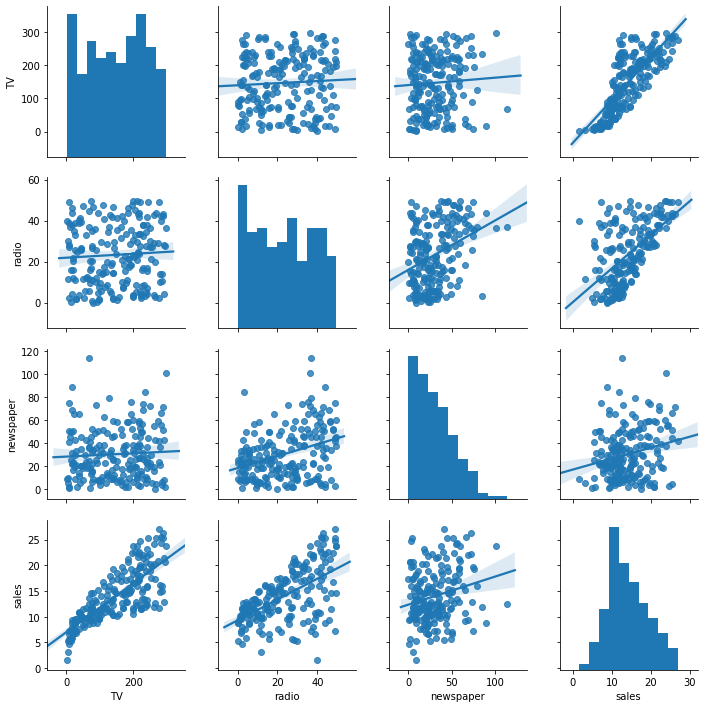

In [8]:
# veriler arasında regresyon grafiği çizilir.
sns.pairplot(data, kind="reg")

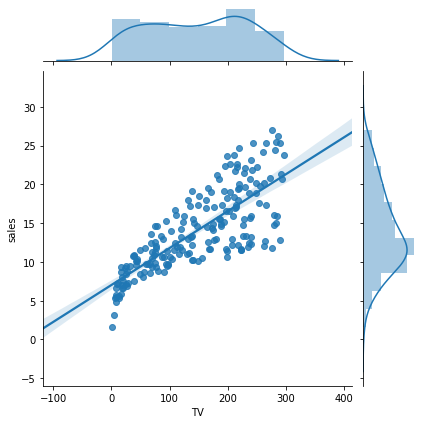

In [9]:
# TV ve sales arasında bir linear reg. olup olmadığına bakıyoruz
sns.jointplot(x='TV', y ='sales', data = data, kind ='reg')

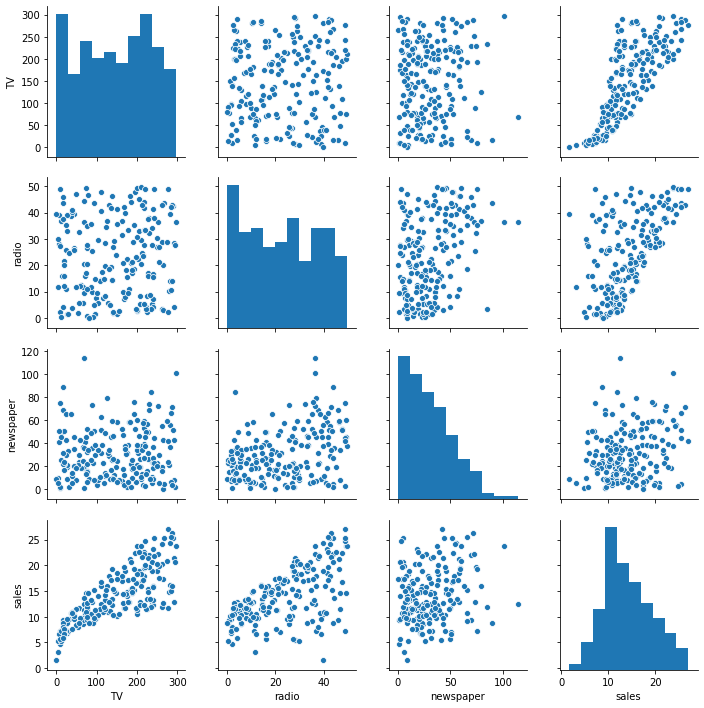

In [10]:
sns.pairplot(data, kind="scatter")

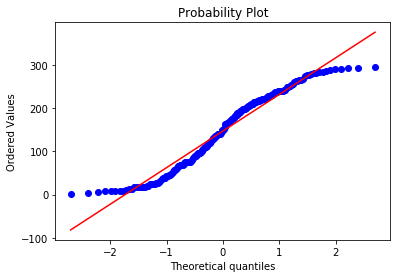

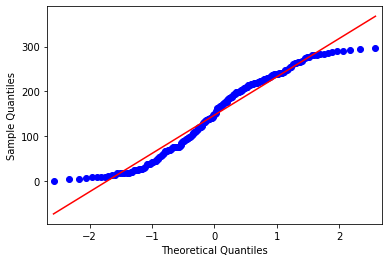

In [11]:
# verilerin normal dağılım olup olmadığı incelenir
# TV verileri normal dağılsaydı bu kırmızı çizgiye tam fit edecekti
stats.probplot(data['TV'], dist = 'norm', plot = pylab)
pylab.show()
sm.qqplot(data['TV'], line = 's')
pylab.show()

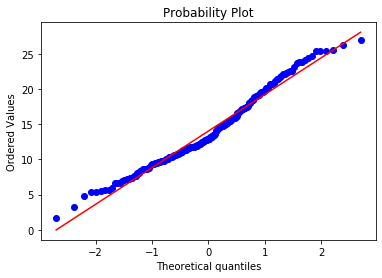

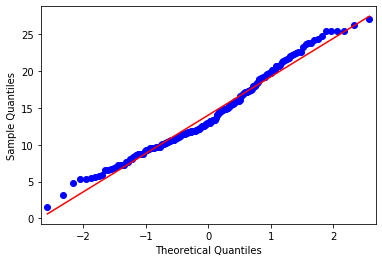

In [12]:
# sales verilerim normale daha yakın
stats.probplot(data['sales'], dist = 'norm', plot = pylab)
pylab.show()
sm.qqplot(data['sales'], line = 's')
pylab.show()

In [13]:
X = data[['TV']]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
X = sm.add_constant(X)
X[0:5]
# B0 yani constant değerin varlığını belirtmek için eklenir.

C:\Users\ihkar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [15]:
y = data['sales']
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()
# H0 önermem B0 = 0 önermesidir. P>|t| değerleri alpha'dan küçük olduğu için bu önerme reddedilir yani B0 0 değildir ve modelde etkilidir.
# R-squared 0 1 arasındadır modelin kalitesini anlatır. 1e yakın model iyidir. 1'e çok yakın olması da model de hata oalbileceği anlamına gelir.
# yeni değişken ekledikçe adjusted R-squared değerine bakılır.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        10:32:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
lm = smf.ols('sales ~ TV', data)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        10:32:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [19]:
model.summary().tables[1]
# p value değeri büyük olan değişkenler model için anlamlı değildir. Bu değişkenleri modelden çıkarmak gerekir. B değerleri 0 olmayabilir.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [20]:
model.conf_int() # modelin coef larının CI

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [21]:
model.f_pvalue # modelin p değeri, tablonun içinden

1.4673897001947095e-42

In [22]:
model.tvalues[0:2] # modelin t değeri, tablonun içinden

Intercept    15.360275
TV           17.667626
dtype: float64

In [23]:
model.rsquared_adj # tablodaki r squared adj değeri

0.6099148238341623

In [24]:
# yeni verilerle prediction yapılması
predictions = model.fittedvalues[0:5] # köşeli parantez içine veri girerek tahmin yapılır
real = y[0:5]
real - predictions  # y - y' tahmin hataları

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
dtype: float64

In [25]:
model.params # reg. modelinin katsayıları

Intercept    7.032594
TV           0.047537
dtype: float64

Text(0, 0.5, 'Satış tahminleri')

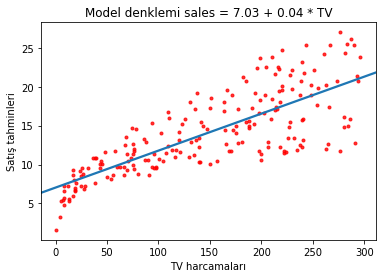

In [26]:
g = sns.regplot(data['TV'], data['sales'], ci = None, scatter_kws = {'color':'r', 's' :9})
g.set_title('Model denklemi sales = 7.03 + 0.04 * TV')
g.set_xlabel('TV harcamaları')
g.set_ylabel('Satış tahminleri')

In [27]:
lm = smf.ols('sales ~ TV + radio + newspaper', data)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        10:32:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# sklearn ile regresyon
from sklearn.linear_model import LinearRegression
X = data[["TV"]]
y = data[["sales"]]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_, model.coef_ # model B0 ve B1 parametreleri

(array([7.03259355]), array([[0.04753664]]))

In [29]:
# modelin score'unu gösterir
model.score(X,y)

0.611875050850071

In [30]:
# predict edilen ilk 10 değeri listeler
model.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [31]:
# yeni verilerle prediction yapılması
yeni_veri = [[5],[90],[200]]
model.predict(yeni_veri)

array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])

In [32]:
#sklearn den mse hesaplanması
# iki farklı modelin karşılaştırılmasında kullanılır
# mse'nin küçük olması, rsquared ve AIC değerleri karşılaştırılır.
from sklearn.metrics import mean_squared_error, r2_score
model = lm.fit()
model.summary()
mse = mean_squared_error(y, model.fittedvalues)
mse

2.784126314510936

In [33]:
k_t = pd.DataFrame(data = y[0:10])   
k_t = pd.concat([k_t, pd.DataFrame(reg.predict(X)[0:10])], axis = 1)
k_t.columns = ["gercek_y","tahmin_y"]
# k_t = pd.DataFrame(data = [y[0:10],reg.predict(X)[0:10]],columns=["gercek_y","tahmin_y"]) 

rmse = np.sqrt(mse)
predict2 = reg.predict(X)[0:10]
real2 = y[0:10]

In [34]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [35]:
print(np.sum(k_t["hata_kare"]))
print(np.mean(k_t["hata_kare"]))
print(np.sqrt(np.mean(k_t["hata_kare"])))

92.90350329638103
9.290350329638105
3.048007599996776


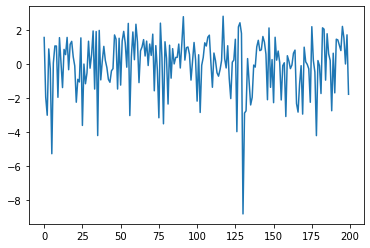

In [36]:
model.resid[0:10]
plt. plot(model.resid)

In [37]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [38]:
# verinin %20'si (test_size = 0.20 parametresi) test verisi olacak şekilde train ve test olarak ayrılması
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = data.drop("sales", axis=1)
y = data["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
X_train.shape, y_train.shape

((160, 3), (160,))

veri setin büyük olduğu zaman train test oranının çok fazla önemi yok ancak düşük veri setiyle çalışırken veri atmak modelin başarısını oldukça etkileyebilir

In [39]:
X_test.shape, y_test.shape

((40, 3), (40,))

In [40]:
training = data.copy()
training.shape

(200, 4)

In [41]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sat, 05 Oct 2019   Prob (F-statistic):                   1.28e-137
Time:                        10:32:23   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
influence = model.get_influence()
influence

In [43]:
# outlier'ların belirlenmesi
# studentized residuals are going to be more effective for 
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

Leverage vs. Studentized residuals


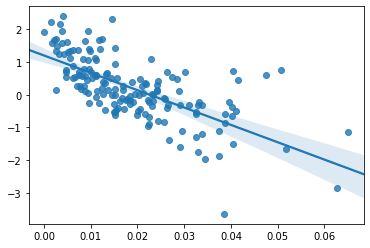

In [44]:
print('Leverage vs. Studentized residuals')
sns.regplot(leverage, model.resid_pearson, fit_reg=True)
# grafikteki regresyon çizgisinin etrafındaki gölgelendirme verimde outlier'lar olduğunu anlatıyor

In [45]:
advres = pd.concat([data, pd.Series(model.resid, name='resid'), pd.Series(model.predict(), name = 'predict')], axis = 1)
model.predict()
advres.head() # residualların gösterimi

,TV,radio,newspaper,sales,resid,predict
0,230.1,37.8,69.2,22.1,-0.041335,8.396375
1,44.5,39.3,45.1,10.4,-1.637545,11.587710
2,17.2,45.9,69.3,9.3,-3.308953,8.967927
3,151.5,41.3,58.5,18.5,0.022542,6.501963
4,180.8,10.8,58.4,12.9,-0.458176,12.793680


### normalitinin test edilmes yöntemleri

C:\Users\ihkar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ihkar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


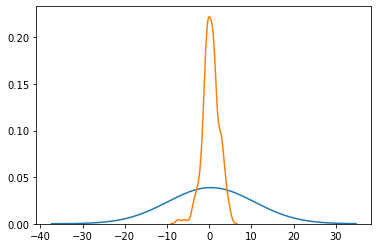

In [46]:
sns.kdeplot(np.array(advres.resid), bw=10)
sns.distplot(np.array(advres.resid), hist = False)
# residualların esas dağılımı
# turuncu grafiğin sol ayağında normalden sapma gözüküyor. residuallarım normal dağılsa da outlierlaradn kaynaklı bir sorun var. 
# bu nedenle verimde constant varyans olmayabilir

In [47]:
# residualları sadece test datası için incelemeliyim
advres = advres.dropna()
stat,p=shapiro(advres.resid)

print('Statictics=%.3f, p=%.3f' %(stat,p))

alpha=0.5
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject)')  
else:
    print('Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject)')

Statictics=0.972, p=0.010
Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject)


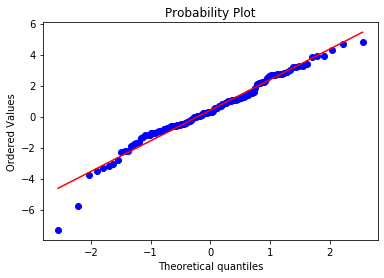

In [48]:
stats.probplot(advres.resid, dist ='norm', plot = pylab)
pylab.show()

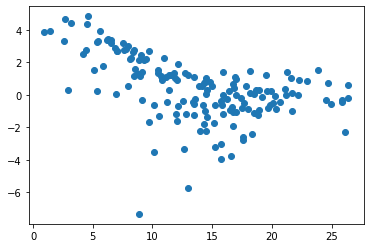

In [49]:
resid = model.resid
plt.scatter(model.predict(), resid)

In [50]:
lm = smf.ols("sales ~ TV+newspaper+radio", data).fit()
lm.summary()
# veriye constant eklemeden oluşturulan OLS modeli constant verileri kendisi oluşturuyor. intercept katsayıları bulunuyor.
# newspaper değişkeninin p değeri 0.05'den büyük olduğu için bu değişkeni reject ediyorum.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        10:32:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices("sales ~ TV+newspaper+radio", data = data, return_type = "dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif
# vif 10'dan büyükse o bağımlı değişkeni modelden atmam gerkiyor
# constant değerin katsayısının büyük olması normaldir
# correlated olduğu zaman değerler büyük bulunur

[6.848899953334954, 1.0046107849396502, 1.1451873787239286, 1.1449519171055353]

### scikit-learn model

In [52]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train,y_train)
print('B0 =', model.intercept_, ', B = ', model.coef_ )# model B0 ve B1 parametreleri
print('model denklemi : {} + {}*TV + {}*newspaper + {}*radio'.format(model.intercept_,model.coef_[0],model.coef_[1],model.coef_[2]))

B0 = 2.979067338122629 , B =  [0.04472952 0.18919505 0.00276111]
model denklemi : 2.979067338122629 + 0.044729517468716326*TV + 0.18919505423437658*newspaper + 0.002761114341367179*radio


In [53]:
# predicting sales from new data
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T
model.predict(yeni_veri) 

array([6.32334798])

In [54]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print('training için mean squarred error : ', rmse)
testrmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print('test için mean squarred error : ', testrmse)
# test ve train verilerinden elde edilen sonuçların birbirine yakın olması gereklidir.

training için mean squarred error :  1.644727765644337
test için mean squarred error :  1.7815996615334502


In [55]:
model.score(X_train, y_train)
# modelimin score u % 89 dur.

0.8957008271017818

In [56]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()
# 10 kere r2 square ile cross validation score hesapla

0.791354859691634

In [57]:
trainmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")).mean()
testmse = np.sqrt(-cross_val_score(model, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")).mean()
print("training mse : ", trainmse)
print("test mse : ", testmse)

training mse :  1.6513523730313335
test mse :  1.8462778823997095


# PCA ( Principle Component Analysis)

Modelleme yaparken sürekli bağımsız değişkenlerin sayısını düşürmek amacıyla kullanılmaktadır.
Veri sayısında sahip olunan x verilerinin sayısının düşürelerek model kurulmasını sağlar.
PCA ile p tane bağımsız değişken k tane uncorrelated değişkene dönüştürülür.

pca bir ön eleme algoritmasıdır. Bütün x değişkenleri arasından en uygun olan yeni x değişkenleri bulunur. Bu yeni x değişkenleri eski x'lerden elde edilmiş yeni değişkenlerdir.

In [58]:
hitters = pd.read_csv("Datasets/Hitters.csv")
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [59]:
hitters.info()
hitters.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [60]:
hitters = hitters.dropna()

In [61]:
hitters.info()
hitters.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931


In [62]:
# kategorik değişkenlerin modele sokulabilmesi için dummy variable oluşturulur.
dms = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [63]:
y = hitters['Salary']
X_ = hitters.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = False)
print('X train : ', X_train.shape)
print('y train : ', y_train.shape)
print('X test : ', X_test.shape)
print('X test : ', y_test.shape)

X train :  (197, 19)
y train :  (197,)
X test :  (66, 19)
X test :  (66,)


In [83]:
X_test

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
245,327.0,68.0,13.0,42.0,29.0,45.0,18.0,3949.0,939.0,78.0,438.0,380.0,466.0,659.0,53.0,7.0,0,0,0
247,341.0,110.0,9.0,45.0,49.0,46.0,9.0,2331.0,658.0,50.0,249.0,322.0,274.0,251.0,9.0,4.0,0,0,0
248,608.0,160.0,28.0,130.0,74.0,89.0,8.0,4071.0,1182.0,103.0,862.0,417.0,708.0,426.0,4.0,6.0,0,0,0
249,419.0,101.0,18.0,65.0,58.0,92.0,20.0,9528.0,2510.0,548.0,1509.0,1659.0,1342.0,0.0,0.0,0.0,0,1,0
251,376.0,82.0,21.0,42.0,60.0,35.0,5.0,1770.0,408.0,115.0,238.0,299.0,157.0,0.0,0.0,0.0,0,1,0
252,486.0,145.0,11.0,51.0,76.0,40.0,11.0,3967.0,1102.0,67.0,410.0,497.0,284.0,88.0,204.0,16.0,1,0,0
255,246.0,76.0,5.0,35.0,39.0,13.0,6.0,912.0,234.0,12.0,102.0,96.0,80.0,44.0,0.0,1.0,0,0,0
256,205.0,52.0,8.0,31.0,27.0,17.0,12.0,5134.0,1323.0,56.0,643.0,445.0,459.0,155.0,3.0,2.0,0,0,0
257,348.0,90.0,11.0,50.0,45.0,43.0,10.0,2288.0,614.0,43.0,295.0,273.0,269.0,60.0,176.0,6.0,0,0,0
258,523.0,135.0,8.0,52.0,44.0,52.0,9.0,3368.0,895.0,39.0,377.0,284.0,296.0,367.0,475.0,19.0,1,1,1


In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
# pca = PCA(n_components= 5) n_components parametresi ile 5 yeni pca'e düşüreleceği bilgisini modele söyleyebiliriz. 
#-default olarak %100'e ulaşacak şekilde bulur.

In [67]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[ 4.33444147, -2.25892629, -1.44643032,  0.27762262, -1.20168819,
         0.03645012, -1.13271315,  0.75225858, -0.98357655, -0.69648546,
         1.17005688, -0.06167558, -0.59004746,  0.02734785, -0.48958927,
        -0.33805957, -0.17219806,  0.1238237 , -0.02024738]])

In [68]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
# veri setindeki x'ler kullanılarak yeni değişkenler türetilir. Bu değişkenlerin variance 
#-değerleri arasından % kaçlık alan benim için yeterli ise cumsum ile karar verebilirim
# model 19 farklı pca buldu. bu 19 pca ile datanın %100ü açıklandı. Bu 19 pca arasından yeterli gördüğümüz kadarını aldık. 
# -Örneğin 5 pca %85 ile benim işimi görür dedim.

array([ 38.76,  59.68,  70.13,  78.77,  84.05,  88.55,  92.38,  94.88,
        96.15,  97.2 ,  97.97,  98.69,  99.22,  99.51,  99.77,  99.91,
        99.98, 100.01, 100.02])

In [69]:
# bütün değişkenlerle yeni bir model kurulması
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [70]:
print(pcr_model.intercept_)
pcr_model.coef_

518.5973299492385


array([ 118.15111494,   -9.72028292,   -4.73567199,   33.12951946,
        -65.36067275,   75.5055788 ,  -33.84634159,  -30.52670717,
         32.98350792,  143.52963079,  -15.17129063, -117.85275588,
        -73.19135349, -148.04360371,  116.94843959,  226.26272262,
       -290.69745828,  726.46397524,  335.27131772])

In [71]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([1061.11330916,  674.47745415,  574.1021304 ,  707.38368699,
        495.15246182])

In [72]:
# modelin train ve test verileri arasındaki hataları incelemek için mse kullanılır
np.sqrt(mean_squared_error(y_train, y_pred))

248.6858010610487

In [73]:
# modeli başka modellerle karşılaştırırken r2 score kullanılır
r2_score(y_train, y_pred)

0.6764620626225791

In [74]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))

In [75]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)

518.5973299492385
[118.15111494  -9.72028292  -4.73567199  33.12951946 -65.36067275
  75.5055788 ]


In [76]:
# test ve train verilerinin ilk 6 pca'i ile elde edilen mse verilerinin karşılaştırılması
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print("Trainining mse: ")
print(np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print("Test mse: ")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Trainining mse: 
277.4389921312935
Test mse: 
476.0173265374501


In [77]:
r2_score(y_train, y_test.T)

ValueError: Found input variables with inconsistent numbers of samples: [197, 66]

# cross validation

In [ ]:
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)
lm = LinearRegression()
RMSE = []

In [ ]:
# farklı x grupları seçilerek modele sokulur ve cross validation değerleri bulunarak en optimal pca sayısı bulunmaya çalışılır.
# minimum RMSE değerine karşılık gelen sayı kadar pca kullanmak optimaldir. 
for i in np.arange(1, X_reduced_train.shape[1] + 1): 
    score = np.sqrt(-1*model_selection.cross_val_score(lm, X_reduced_train[:,:i], y_train.ravel(), cv=cv_10, scoring = 'neg_mean_squared_error').mean())
    RMSE.append(score)

In [ ]:
RMSE

train test ayrımı: 
train ve testin mean square error lerinin yakın olması 
r2 score ları karşılaştırılır
cross val
randomlık ı atmak için
veri küçük gruplara ayrılarak modelin performansları ölçülerek ortalama alınır